In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
df=df[['QUANTITYORDERED', 'ORDERLINENUMBER']]
df=df.dropna(axis=0)

In [6]:
df

,QUANTITYORDERED,ORDERLINENUMBER
0,30,2
1,34,5
2,41,2
3,45,6
4,49,14
...,...,...
2818,20,15
2819,29,1
2820,43,4
2821,34,1


In [7]:
df.isnull().sum()

QUANTITYORDERED    0
ORDERLINENUMBER    0
dtype: int64

In [8]:
df.duplicated().sum()

2260

In [10]:
from sklearn.cluster import KMeans

<Axes: >

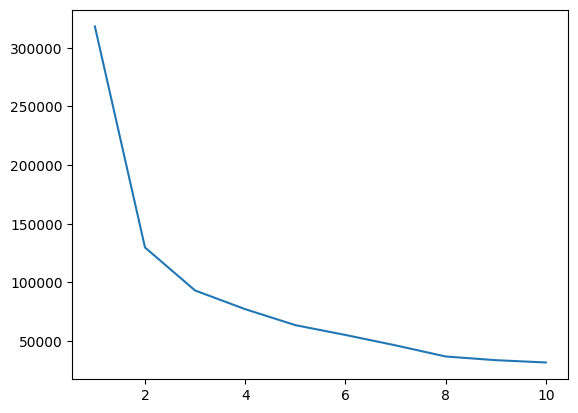

In [12]:
wcss = []
for i in range (1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
ks= [1,2,3,4,5,6,7,8,9,10]
sns.lineplot(x=ks, y=wcss)

Text(0.5, 1.0, 'using elbow clustering')

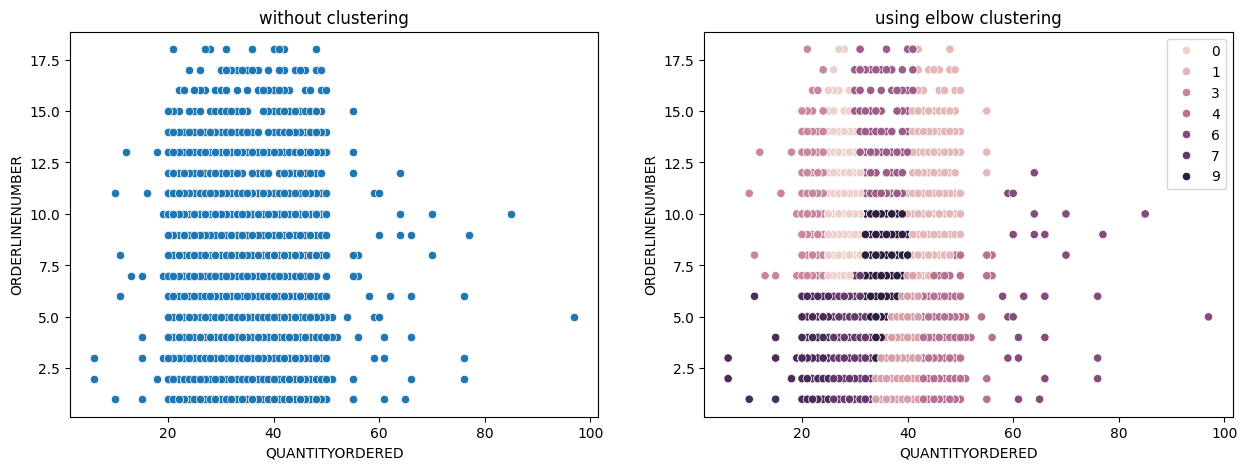

In [16]:
fig,axes =plt.subplots(nrows=1, ncols=2, figsize = (15,5))
sns.scatterplot(ax=axes[0], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title('without clustering')
sns.scatterplot(ax=axes[1], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering.labels_).set_title('using elbow clustering')

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()
scaled = ss.fit_transform(df)

<Axes: >

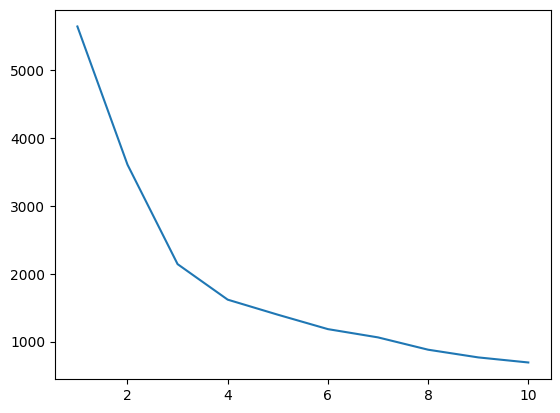

In [20]:
wcss_sc =[]
for i in range(1, 11):
    clustering_sc =KMeans(n_clusters=i, init='k-means++', random_state=24)
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]
sns.lineplot(x=ks, y=wcss_sc)

Text(0.5, 1.0, 'using elbow method and scaled_data')

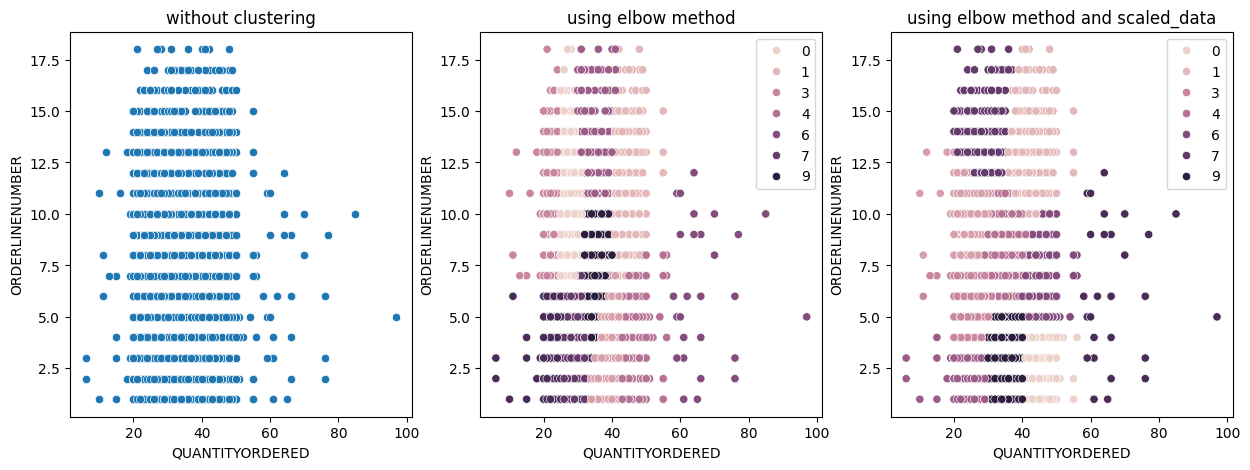

In [21]:
fig,axes =plt.subplots(nrows=1, ncols=3, figsize = (15,5))
sns.scatterplot(ax=axes[0], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title('without clustering')
sns.scatterplot(ax=axes[1], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering.labels_).set_title('using elbow method')
sns.scatterplot(ax=axes[2], data=df, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering_sc.labels_).set_title('using elbow method and scaled_data')

Text(0, 0.5, 'wcss')

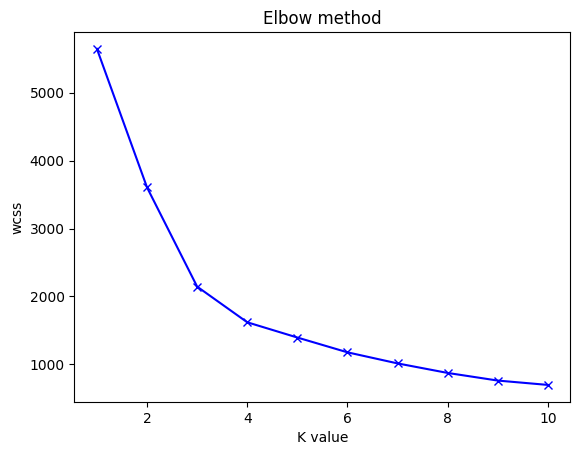

In [22]:
wcss=[]
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled)
    wcss.append(clustering.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]
plt.plot(ks, wcss, 'bx-')
plt.title('Elbow method')
plt.xlabel('K value')
plt.ylabel('wcss')